# Functions

In [32]:
import matplotlib.pyplot as plt
import numpy as np

In [33]:
#-----------------------------------------#
#             Bulk Spectral               #
#-----------------------------------------#
def plot_emp_evals_bulk(empirical_bulk_distribution, bins, ax):
       bin_centers = (bins[1]-bins[0])/2 + bins[:-1]
       w = (bins[1]-bins[0])
       ax.bar(bin_centers, 
              empirical_bulk_distribution, 
              width=w, 
              color='k', 
              alpha=.3)
       return

def plot_pred_evals_bulk(predicted_bulk_distribution, bins, ax):
       predicted_bulk_distribution[0] = 0
       predicted_bulk_distribution[-1] = 0
       ax.plot(bins, predicted_bulk_distribution, 'k')       
       return

def plot_emp_evals_isolated(emp_bnd, emp_lam, bar_width, bar_height, ax):
       w = bar_width
       h = bar_height
       ax.bar(emp_bnd, height=h, width=w, color=colors[0])
       ax.annotate(f'$\\lambda_b$',
                     xy=(emp_bnd, h),
                     ha='center',
                     va='bottom',
                     fontsize=8,
                     color=colors[0])
       idx = 1
       labels = ['$\\lambda_3$', '$\\lambda_2$', '$\\lambda_1$']
       for i, lam in enumerate(emp_lam):
              if abs(lam - emp_bnd) > 1:
                     ax.bar(lam, height=h, width=w, color=colors[idx])
                     ax.annotate(labels[idx-1],
                                   xy=(lam, h),
                                   ha='center',
                                   va='bottom',
                                   fontsize=8,
                                   color=colors[idx])
                     idx += 1
       return

def plot_pred_eval_isolated(predicted_boundary, predicted_lambdas, ax):
       ax.plot(predicted_boundary, .1, '+', color='r')
       for i in range(len(predicted_lambdas)):
              ax.plot(predicted_lambdas[i], .1, '+', color=colors[i])
       return

def plot_shading_evals(emp_bndry, emp_lambdas, ax):
       lam_1 = emp_lambdas[np.argmax(abs(emp_lambdas-emp_bndry>1))]
       ax.axvspan(lam_1, emp_bndry, color='g', alpha=.3)
       return



#-----------------------------------------#
#             Eigenvalues                 #
#-----------------------------------------#
def plot_emp_evals_vs_size(sizes, all_emp_bndry, all_emp_lambdas, ax):
       ax.plot(sizes, all_emp_bndry, 'x', color=colors[0], label=f'$\\lambda_b$')
       labels = ['$\\lambda_3$', '$\\lambda_2$', '$\\lambda_1$']
       for i, lam in enumerate(all_emp_lambdas.T):
               ax.plot(sizes, lam, 'x', color=colors[i+1], label=labels[i])

def plot_pred_evals_vs_size(sizes, all_pred_bndry, all_pred_lambdas, ax):
       ax.plot(sizes, all_pred_bndry, color=colors[0])
       for i, lam in enumerate(all_pred_lambdas.T):
              ax.plot(sizes, lam, color=colors[i+1])

def plot_shading_evals_vs_size(sizes, all_pred_bndry, all_pred_lambdas, ax):
       ax.fill_between(sizes, all_pred_bndry, all_pred_lambdas[:,0], color='g', alpha=.3)


#-----------------------------------------#
#             Eigenvectors                #
#-----------------------------------------#

def plot_emp_evecs(emp_bndry, emp_lambdas, emp_evecs, ax, alpha):
       idx = 0
       labels = [r'$u^{(3)}$', r'$u^{(2)}$', r'$u^{(1)}$']
       for i, lam in enumerate(emp_lambdas):
              if abs(lam)-emp_bndry > 1:
                     vec = emp_evecs[:,i]
                     vec = fix_sign(vec)
                     ax.plot(vec, 'x', color=colors[idx+1], alpha=alpha, label=labels[idx])
                     idx += 1

def plot_pred_evecs(pred_bndry, pred_lambdas, pred_evecs, ax):
       idx = 0
       for i, lam in enumerate(pred_lambdas):
              if abs(lam)-pred_bndry > .1:
                     vec = pred_evecs[:,i]
                     vec = fix_sign(vec)
                     ax.plot(vec, color=colors[idx+1], alpha=1)
                     idx += 1      



#-----------------------------------------#
#             Inner Products              #
#-----------------------------------------#

def plot_emp_ips(sizes, all_emp_ips, ax):
       ax.plot(sizes, all_emp_ips, 'x', label='Emperical', color='#1f77b4')

def plot_pred_ips(sizes, all_pred_ips, ax):
       ax.plot(sizes, all_pred_ips, label='Predicted', color='#1f77b4')

#-----------------------------------------#
#             Loading Data               #
#-----------------------------------------#

def load_emp_spectra_bulk(filepath, filename):
       emp_blk_spct = np.load(filepath + filename + f'_emp_blk_spct.npy')
       emp_blk_bins = np.load(filepath + filename + f'_emp_blk_bins.npy')
       return emp_blk_spct, emp_blk_bins

def load_emp_spectra_isolated(filepath, filename):
       emp_bndry = np.load(filepath + filename + f'_emp_boundaries.npy')
       emp_lambdas = np.load(filepath + filename + f'_emp_lambdas.npy')
       emp_evecs = np.load(filepath + filename + f'_emp_evecs.npy')
       return emp_bndry, emp_lambdas, emp_evecs


def load_pred_spectra_bulk(filepath, filename): 
       pred_blk_spct = np.load(filepath + filename + f'_pred_blk_spct.npy')
       return pred_blk_spct


def load_pred_spectra_isolated(filepath, filename):
       pred_bndry = np.load(filepath + filename + f'_pred_boundaries.npy')
       pred_lambdas = np.load(filepath + filename + f'_pred_lambdas.npy')
       pred_evecs = np.load(filepath + filename + f'_pred_evecs.npy')
       return pred_bndry, pred_lambdas, pred_evecs

def load_inner_products(filepath, filename):
       emp_ips = np.load(filepath + filename + f'_emp_ips.npy')
       pred_ips = np.load(filepath + filename + f'_pred_ips.npy')
       return emp_ips, pred_ips

def collect_eigenvalues(filepath, sizes, prob_in, prob_out, mat_type):
       if mat_type == 'A':
              idx = 1
       if mat_type == 'B1' or mat_type == 'B':
              idx = 2
       if mat_type == 'B2':
              idx = 3
       all_emp_bndry = []
       all_emp_lambdas = []
       all_pred_bndry = []
       all_pred_lambdas = []
       for i, K in enumerate(sizes):
              filename = f'/{K}_{prob_in}_{prob_out}_{mat_type}'
              emp_bndry = np.load(filepath + filename + f'_emp_boundaries.npy')
              emp_lambdas = np.load(filepath + filename + f'_emp_lambdas.npy')
              pred_bndry = np.load(filepath + filename + f'_pred_boundaries.npy')
              pred_lambdas = np.load(filepath + filename + f'_pred_lambdas.npy')
              all_emp_bndry.append(emp_bndry)
              all_emp_lambdas.append(emp_lambdas[idx:])
              all_pred_bndry.append(pred_bndry)
              all_pred_lambdas.append(pred_lambdas[idx:])
       all_emp_bndry = np.array(all_emp_bndry)
       all_emp_lambdas = np.array(all_emp_lambdas)
       all_pred_bndry = np.array(all_pred_bndry)
       all_pred_lambdas = np.array(all_pred_lambdas)
       return all_emp_bndry, all_emp_lambdas, all_pred_bndry, all_pred_lambdas


def collect_innerproducts(filepath, sizes, prob_in, prob_out, mat_type):
       if mat_type == 'A':
              idx = 1
       if mat_type == 'B1' or mat_type == 'B':
              idx = 2
       if mat_type == 'B2':
              idx = 3
       all_emp_ips = []
       all_pred_ips = []
       for i, K in enumerate(sizes):
              filename = f'/{K}_{prob_in}_{prob_out}_{mat_type}'
              emp_ips = np.load(filepath + filename + f'_emp_ips.npy')
              pred_ips = np.load(filepath + filename + f'_pred_ips.npy')
              all_emp_ips.append(emp_ips[idx])
              all_pred_ips.append(pred_ips[idx])
       all_emp_ips = np.array(all_emp_ips)
       all_pred_ips = np.array(all_pred_ips)
       return all_emp_ips, all_pred_ips

#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------


def fix_sign(vec):
       if vec[0] < 0:
              vec = -vec
       if vec[len(vec)//2-5] < 0:
              vec = -vec
       return vec


def get_percent_correct(vec):
    idx = np.argsort(-vec)
    V_K = idx[:K]
    anom_idx = np.arange((N-K)//2, (N+K)//2)
    correct_idx = np.intersect1d(V_K, anom_idx)
    val = len(correct_idx)*100//K
    return val

def get_performance_metrics(pred_vector, true_vector):
    anom_size = np.count_nonzero(true_vector)
    pred_true = np.argsort(-pred_vector)[:anom_size]
    pred_false = np.argsort(-pred_vector)[anom_size:]
    true_idx = np.argsort(-true_vector)[:anom_size]
    true_positive = np.intersect1d(pred_true, true_idx)
    false_positive = np.setdiff1d(pred_true, true_idx)
    true_negative = np.setdiff1d(pred_false, true_idx)
    false_negative = np.setdiff1d(true_idx, pred_true)
    return true_positive, false_positive, true_negative, false_negative 

def get_true_vector(N, K):
    vec = np.zeros(N)
    vec[(N-K)//2:(N+K)//2] = 1/np.sqrt(K)
    return(vec)

def plot_degrees(deg_vector, eig_vector, tp, fp, tn, fn, ax):
    ax.plot(deg_vector[tn], eig_vector[tn], '.', c='b', alpha=.5, markersize=3, label='TN')
    ax.plot(deg_vector[tp], eig_vector[tp], 'x', c='g', alpha=1, markersize=7, label='TP')
    ax.plot(deg_vector[fp], eig_vector[fp], 'x', c='r', alpha=1, markersize=7, label='FP')
    ax.plot(deg_vector[fn], eig_vector[fn], 'x', c='c', alpha=1, markersize=7, label='FN')
    ax.set_xlabel(f'Node Degree, $d_i$')
    ax.set_ylabel(r'Eigenvector Entry, $u^{(1)}_i$')

def plot_distribution(eig_vector, tp, fp, tn, fn, ax, color):
    ax_main = ax
    ax_yhist = ax_main.inset_axes([1, 0.0, 0.3, 1])

    ax_main.plot(tn, eig_vector[tn], '.', c=color, alpha=.5, markersize=3, label='TN')
    ax_main.plot(tp, eig_vector[tp], 'x', c='g', alpha=1, markersize=7,label='TP')
    ax_main.plot(fp, eig_vector[fp], 'x', c='r', alpha=1, markersize=7, label='FP')
    ax_main.plot(fn, eig_vector[fn], 'x', c='c', alpha=1, markersize=7, label='FN')
    # ax_main.set_xlabel(f'Index, $i$')
    # ax_main.set_ylabel(r'Eigenvector Entry, $u^{(1)}_i$')

    ax_yhist.hist(eig_vector[tn], bins=30, color=color, alpha=0.7, edgecolor=color, orientation='horizontal')
    ax_yhist.set_yticks([])  # Hide y-ticks
    ax_yhist.set_xticks([])  # Hide x-ticks
    ax_yhist.set_ylim(ax_main.get_ylim())

def get_roc_rates(pred_vector, true_vector, thresholds):
    tprs = []
    fprs = []
    for threshold in thresholds:
        anom_size = np.count_nonzero(true_vector)
        pred_true = np.argsort(-pred_vector)[:threshold]
        pred_false = np.argsort(-pred_vector)[threshold:]
        true_idx = np.argsort(-true_vector)[:anom_size]
        true_positive = np.intersect1d(pred_true, true_idx)
        false_positive = np.setdiff1d(pred_true, true_idx)
        true_negative = np.setdiff1d(pred_false, true_idx)
        false_negative = np.setdiff1d(true_idx, pred_true)
        true_positive_rate = len(true_positive) / (len(true_positive) + len(false_negative))
        false_positive_rate = len(false_positive) / (len(false_positive) + len(true_negative))    # False positive rate
        tprs.append(true_positive_rate)
        fprs.append(false_positive_rate)
    return tprs, fprs



# Figure 2 - Classification metrics


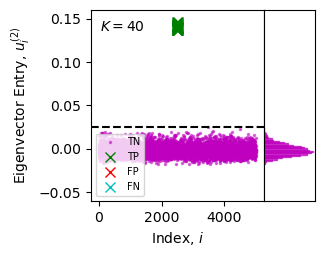

In [34]:
mat_type = 'A'
N = 5000
K = 40
prob_in = .06
prob_out = .06
prob_anom = 1
filepath = '../data/' + str(N)
filename = f'/{K}_{prob_in}_{prob_out}_{mat_type}'

# Change the following for eigenvector needed
index = 2
ylabel = r'Eigenvector Entry, $u^{(2)}_i$'
color = 'm'
# ylim = (0.01, 0.019)
ylim = (-.06,.16)


fig, ax = plt.subplots(1,1, figsize=(2.5,2.5))
fig.tight_layout()
emp_evecs = np.load(filepath + filename + f'_emp_evecs.npy')
pred_vec = fix_sign(emp_evecs[:,-index])
true_vec = get_true_vector(N, K)
tp, fp, tn, fn = get_performance_metrics(pred_vec, true_vec)

axis = ax
axis.set_ylim(ylim)
plot_distribution(pred_vec, tp, fp, tn, fn, axis, color)
axis.set_xlabel(f'Index, $i$')
axis.set_ylabel(ylabel)
axis.legend(fontsize=7, loc='lower left')
axis.text(0.05, 0.95, f'$K={K}$', transform=axis.transAxes, 
        fontsize=10, verticalalignment='top', horizontalalignment='left',
        bbox=dict(facecolor='white', alpha=0))

idx = np.argsort(-pred_vec)[K]
val = pred_vec[idx]
axis.axhline(val, c='k', linestyle='--')


# fig.savefig(f'../figures/raw/fig2_u{index}_{K}.pdf', bbox_inches='tight')


# Figure 2 - ROC Curves

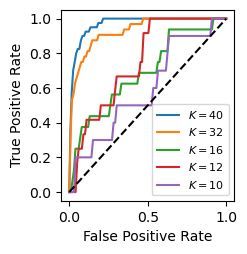

In [35]:
mat_type = 'A'
index = 1
N = 5000
prob_in = .06
prob_out = .06
prob_anom = 1

filepath = '../data/' + str(N)

fig, ax = plt.subplots(1,1, figsize=(2.5,2.5))
fig.tight_layout()

# ---------------------------
# Plot ROC
# ---------------------------
axis = ax
thresholds = np.linspace(0,5000,100, dtype=int)
greys = [(0,0,0),          # Black
        (1.0, 0.9, 0.6),  # Light orange
                    (1.0, 0.7, 0.3),  # Medium-light orange
                    (1.0, 0.5, 0.0),  # Orange
                    (0.8, 0.3, 0.0)]  # Dark orange

for i, K in enumerate(reversed([10,12,16,32, 40])):
    filename = f'/{K}_{prob_in}_{prob_out}_{mat_type}'
    emp_evecs = np.load(filepath + filename + f'_emp_evecs.npy')
    pred_vec = fix_sign(emp_evecs[:,-index])
    true_vec = get_true_vector(N, K)    
    tprs, fprs = get_roc_rates(pred_vec, true_vec, thresholds)
    axis.plot(fprs, tprs, label=f'$K=${K}')
axis.plot([0,1], [0,1], linestyle='--', c='k')
axis.set_xlabel('False Positive Rate')
axis.set_ylabel('True Positive Rate')
axis.legend(fontsize=8, loc='lower right')

# fig.savefig(f'../figures/raw/fig2_u{index}_roc.pdf', bbox_inches='tight')

# Figure 2 (collected) - Degrees, classification, and ROC 

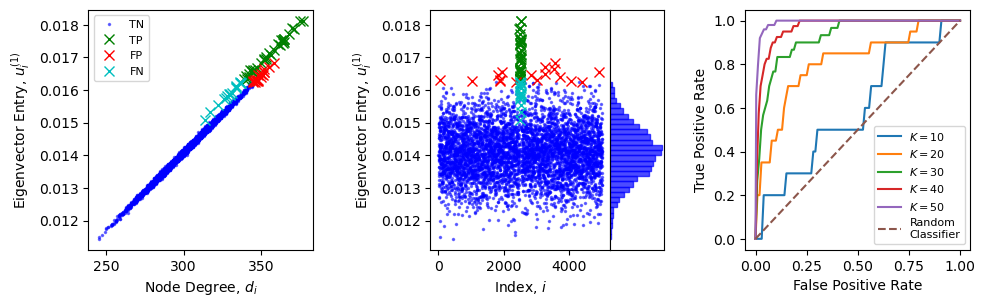

In [36]:
mat_type = 'A'
vec_idx = -1
N = 5000
prob_in = .06
prob_out = .06
prob_anom = 1
K = 50

filepath = '../data/' + str(N)
filename = f'/{K}_{prob_in}_{prob_out}_{mat_type}'
degrees = np.load(filepath + filename + f'_degrees.npy')
emp_evecs = np.load(filepath + filename + f'_emp_evecs.npy')

pred_vec = fix_sign(emp_evecs[:,vec_idx])
true_vec = get_true_vector(N, K)
tp, fp, tn, fn = get_performance_metrics(pred_vec, true_vec)

fig, ax = plt.subplots(1,3, figsize=(9,3))
ax[0].set_position([0.05, 0.1, 0.25, 0.8])
ax[1].set_position([0.43, 0.1, 0.2, 0.8])
ax[2].set_position([0.78, 0.1, 0.25, 0.8])

# ---------------------------
# Plot Degrees
# ---------------------------
axis = ax[0]
plot_degrees(degrees, pred_vec, tp, fp, tn, fn, axis)
axis.legend(fontsize=8)

# ---------------------------
# Plot Distribution
# ---------------------------
axis = ax[1]
plot_distribution(pred_vec, tp, fp, tn, fn, axis, 'b')
axis.set_xlabel(f'Index, $i$')
axis.set_ylabel(r'Eigenvector Entry, $u^{(1)}_i$')

# ---------------------------
# Plot ROC
# ---------------------------
axis = ax[2]
thresholds = np.linspace(0,5000,100, dtype=int)
for K in [10, 20, 30, 40, 50]:
    filename = f'/{K}_{prob_in}_{prob_out}_{mat_type}'
    emp_evecs = np.load(filepath + filename + f'_emp_evecs.npy')
    pred_vec = fix_sign(emp_evecs[:,vec_idx])
    true_vec = get_true_vector(N, K)    
    tprs, fprs = get_roc_rates(pred_vec, true_vec, thresholds)
    axis.plot(fprs, tprs, label=f'$K=${K}')
axis.plot([0,1], [0,1], label='Random\nClassifier', linestyle='--')
axis.set_xlabel('False Positive Rate')
axis.set_ylabel('True Positive Rate')
axis.legend(fontsize=8, loc='lower right')

# fig.savefig('../figures/finished/deg.pdf', bbox_inches='tight')


# Figure 2 - (collected) Small K classification, large K classification, ROC curves

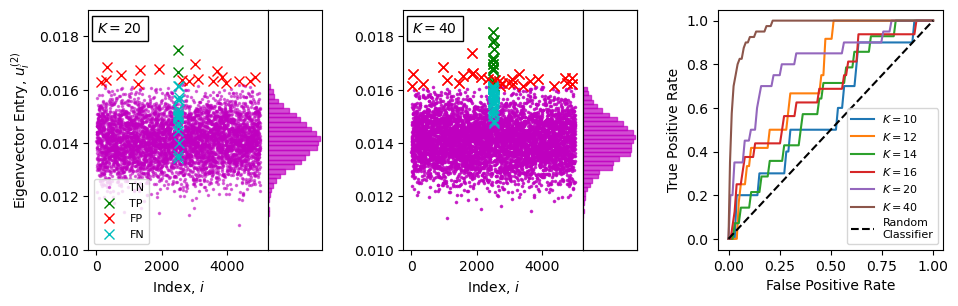

In [37]:
mat_type = 'A'
index = 1
N = 5000
prob_in = .06
prob_out = .06
prob_anom = 1

fig, ax = plt.subplots(1,3, figsize=(9,3))
ax[0].set_position([0.05, 0.1, 0.2, 0.8])
ax[1].set_position([0.40, 0.1, 0.2, 0.8])
ax[2].set_position([0.75, 0.1, 0.25, 0.8])

ylim = (0.01, 0.019)
colors = ['b', 'm']
# ---------------------------
# Plot Distribution (small K)
# ---------------------------
K = 20
filepath = '../data/' + str(N)
filename = f'/{K}_{prob_in}_{prob_out}_{mat_type}'
# degrees = np.load(filepath + filename + f'_degrees.npy')
emp_evecs = np.load(filepath + filename + f'_emp_evecs.npy')
pred_vec = fix_sign(emp_evecs[:,-index])
true_vec = get_true_vector(N, K)
tp, fp, tn, fn = get_performance_metrics(pred_vec, true_vec)

axis = ax[0]
axis.set_ylim(ylim)
plot_distribution(pred_vec, tp, fp, tn, fn, axis, colors[index])
axis.set_xlabel(f'Index, $i$')
axis.set_ylabel(r'Eigenvector Entry, $u^{(2)}_i$')
axis.legend(fontsize=8, loc='lower left')
# axis.set_title(f'$K={K}$')
axis.text(0.05, 0.95, f'$K={K}$', transform=axis.transAxes, 
        fontsize=10, verticalalignment='top', horizontalalignment='left',
        bbox=dict(facecolor='white', alpha=1))

# ---------------------------
# Plot Distribution (large K)
# ---------------------------
K = 40
filepath = '../data/' + str(N)
filename = f'/{K}_{prob_in}_{prob_out}_{mat_type}'
emp_evecs = np.load(filepath + filename + f'_emp_evecs.npy')
pred_vec = fix_sign(emp_evecs[:,-index])
true_vec = get_true_vector(N, K)
tp, fp, tn, fn = get_performance_metrics(pred_vec, true_vec)

axis = ax[1]
axis.set_ylim(ylim)
plot_distribution(pred_vec, tp, fp, tn, fn, axis, colors[index])
axis.set_xlabel(f'Index, $i$')
axis.text(0.05, 0.95, f'$K={K}$', transform=axis.transAxes, 
        fontsize=10, verticalalignment='top', horizontalalignment='left',
        bbox=dict(facecolor='white', alpha=1))

# ---------------------------
# Plot Distribution
# ---------------------------
axis = ax[1]
plot_distribution(pred_vec, tp, fp, tn, fn, axis, colors[index])

# ---------------------------
# Plot ROC
# ---------------------------
axis = ax[2]
thresholds = np.linspace(0,5000,100, dtype=int)
for K in [10, 12, 14, 16, 20, 40]:
    filename = f'/{K}_{prob_in}_{prob_out}_{mat_type}'
    emp_evecs = np.load(filepath + filename + f'_emp_evecs.npy')
    pred_vec = fix_sign(emp_evecs[:,-index])
    true_vec = get_true_vector(N, K)    
    tprs, fprs = get_roc_rates(pred_vec, true_vec, thresholds)
    axis.plot(fprs, tprs, label=f'$K=${K}')
axis.plot([0,1], [0,1], label='Random\nClassifier', linestyle='--', c='k')
axis.set_xlabel('False Positive Rate')
axis.set_ylabel('True Positive Rate')
axis.legend(fontsize=8, loc='lower right')

# fig.savefig('../figures/raw/fig3_u{index}.pdf', bbox_inches='tight')
